# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
! pip install newsapi-python

In [71]:
pip install wordcloud

     |████████████████████████████████| 220 kB 1.8 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=160871 sha256=20e8a19483994701478725e08dcd11ca94426c28df781eafa78ad03e85a8935d
  Stored in directory: /Users/luccabiagio/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [49]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient # pip install newsapi-python 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/luccabiagio/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
# Read your api key environment variable
load_dotenv('LT.env')
api_key = os.getenv("news_api")


In [51]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [73]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="btc",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
btc_headlines["totalResults"]

2178

In [74]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en", 
    page_size=100,
    sort_by="relevancy"
)
                                      
eth_headlines['totalResults']

3790

In [75]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893
1,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
2,2021-06-07,"Sen. Mark Warner (D-VA) on January 30, 2020 an...",0.0000,0.000,0.0,1.000
3,2021-06-13,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...,0.5859,0.134,0.0,0.866
4,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957


In [76]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917
1,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
2,2021-05-20,,0.0000,0.000,0.000,0.000
3,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000
4,2021-05-19,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.132,0.801


In [59]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
eth_sentiment = eth_df.join(title_sentiment_df).join(text_sentiment_df)

eth_sentiment.head()


,date,description,language,text,title,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-05-15,Solana isn’t known yet outside of the crypto c...,en,Solana isn’t known yet outside of the crypto c...,"Solana, a blockchain platform followed by top ...",0.2023,0.122,0.878,0.000,1,0.4019,0.083,0.917,0.000,1
1,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",en,"Bitcoin, Ethereum and a host of Altcoins suffe...",Bitcoin crashes as investors fear crypto bull ...,-0.4939,0.000,0.789,0.211,-1,-0.2023,0.066,0.847,0.087,-1
2,2021-05-20,Vitalik Buterin is the 27-year-old co-founder ...,en,,Ethereum's 27-year-old founder says we're in a...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,0.000,0.000,0
3,2021-05-31,Cryptocurrency Ethereum extended gains to rise...,en,A representation of virtual currency Ethereum ...,Ethereum extends gains to rise 8%; bitcoin fir...,0.4404,0.358,0.642,0.000,1,0.0000,0.000,1.000,0.000,0
4,2021-05-19,NVIDIA is extending its limits on GPU capacity...,en,GPU shortages and inflated prices have become ...,Most new NVIDIA RTX gaming GPUs will be crypto...,0.0000,0.000,1.000,0.000,0,-0.3612,0.067,0.801,0.132,-1


In [77]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.107716,0.067200,0.048240,0.884570
std,0.365627,0.053616,0.048436,0.061315
min,-0.827100,0.000000,0.000000,0.695000
25%,-0.126875,0.000000,0.000000,0.856000
50%,0.226300,0.081500,0.058000,0.856000
75%,0.243725,0.086000,0.063000,0.930000
max,0.796400,0.227000,0.261000,1.000000


In [78]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.067057,0.050670,0.033360,0.905950
std,0.340882,0.058465,0.053976,0.120726
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.177900,0.000000,0.000000,0.865500
50%,0.000000,0.043500,0.000000,0.928000
75%,0.339700,0.082250,0.062500,1.000000
max,0.778300,0.246000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC had a better result with mean of 0.0627. ETH had score of 0.0506 

Q: Which coin had the highest compound score?

A: BTC had the highest compound score with 0.1077(vs 0.670 for ETH. 

Q. Which coin had the highest positive score?

A: ETH had the highest positive score, with 0.2460 (vs. 0.2270 of BTC)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [62]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [79]:
# Instantiate the lemmatizer
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))    

In [80]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [81]:
# Create a new tokens column for Bitcoin
btc_df['new_tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,new_tokens
0,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."
1,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
2,2021-06-07,"Sen. Mark Warner (D-VA) on January 30, 2020 an...",0.0000,0.000,0.0,1.000,"[sen, mark, warner, dva, january, sen, roy, bl..."
3,2021-06-13,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...,0.5859,0.134,0.0,0.866,"[reuters, staffjune, reuters, tesla, incs, elo..."
4,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."


In [82]:
# Create a new tokens column for Ethereum
eth_df['new_tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,new_tokens
0,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917,"[solana, isnt, known, yet, outside, crypto, co..."
1,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,2021-05-20,,0.0000,0.000,0.000,0.000,[]
3,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
4,2021-05-19,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.132,0.801,"[gpu, shortage, inflated, price, become, bypro..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [83]:
# Generate the Bitcoin N-grams where N=2
concat_btc_text = btc_df['text'].str.cat()
tokenized_btc_col = tokenizer(concat_btc_text)
ngram_counts = Counter(ngrams(tokenized_btc_col, n=2))

In [84]:
# Generate the Ethereum N-grams where N=2
concat_eth_text = eth_df['text'].str.cat()
tokenized_eth_col = tokenizer(concat_eth_text)
ngram_counts = Counter(ngrams(tokenized_eth_col, n=2))

In [85]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [86]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenized_btc_col)

[('privacy', 56), ('bitcoin', 43), ('right', 32)]

In [87]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenized_eth_col)

[('bitcoin', 28), ('crypto', 25), ('cryptocurrency', 21)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

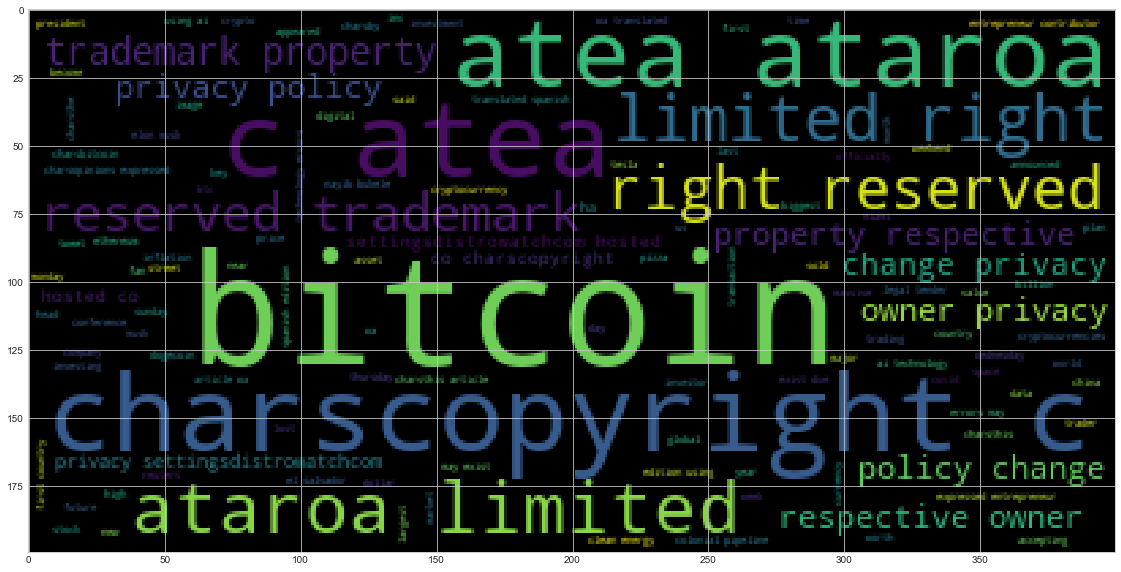

In [89]:
# Generate the Bitcoin word cloud
big_string = ' '.join(tokenized_btc_col)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

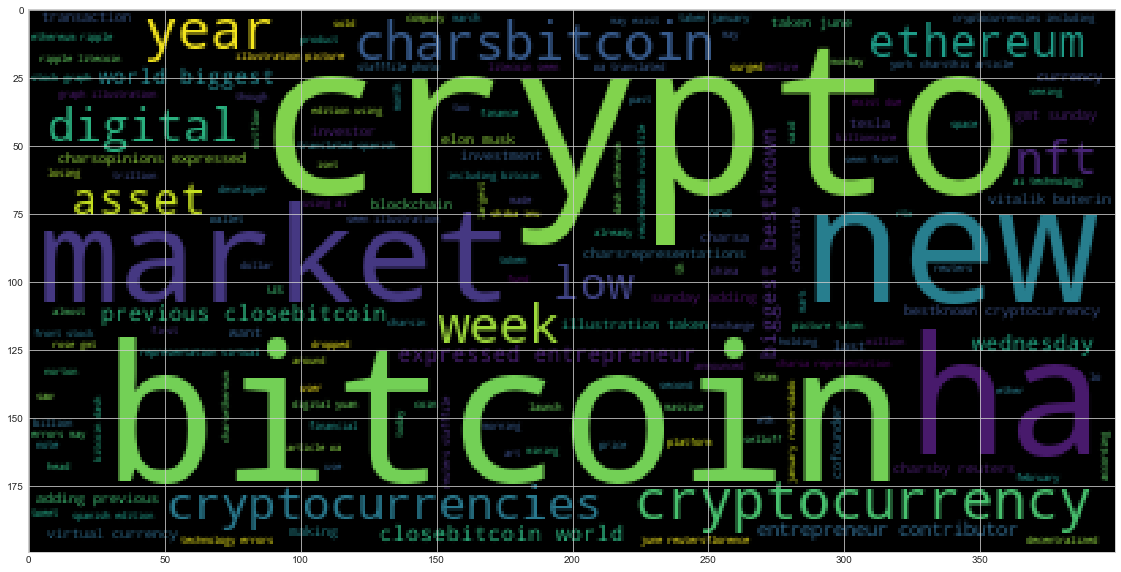

In [90]:
# Generate the Ethereum word cloud
big_string = ' '.join(tokenized_eth_col)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [93]:
pip install spacy

     |████████████████████████████████| 12.4 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 590 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 18.7 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107095 sha256=46d05bfce762f4f562c724013f70c402826a8219695852b0abde550b143eac89
  Stored in directory: /Users/luccabiagio/Library/Caches/pip/wheels/83/a6/12/bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [94]:
import spacy
from spacy import displacy

In [95]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 9.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [96]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [97]:
# Concatenate all of the Bitcoin text together
bitcoin_string = ' '.join(tokenized_btc_col)

In [98]:
# Run the NER processor on all of the text
btc_doc = nlp(bitcoin_string)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [99]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [100]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['last weekend', 'past month first', 'billion', 'sunday', 'first', 'wednesday', 'wednesday', 'two', 'monday', 'wednesday', 'early hour', 'wednesday', 'recent day', 'thursday', 'thursday', 'friday', 'wednesday', 'thursday', 'first', 'wednesday', 'morning', 'monday', 'half trillion dollar', 'three month ago', 'month', 'charslast week', 'today', 'first', 'couple day', 'half', 'first', 'first', 'sunday', 'wednesday', 'american', 'bad week', 'thursday', 'charsthis week', 'eth', 'first', 'billion', 'another week', 'last week', 'september', 'million', 'seven million', 'last weekend', 'monday', 'week', 'last month', 'first', 'first', 'november', 'first', 'sunday', 'first', 'today', 'billion dollar', 'first', 'first', 'charsthis week', 'one', 'three time week', 'early monday', 'last week']


---

### Ethereum NER

In [101]:
# Concatenate all of the Ethereum text together
ethereum_string = ' '.join(tokenized_eth_col)

In [102]:
# Run the NER processor on all of the text
eth_doc = nlp(ethereum_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [103]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [104]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['tuesday night', 'wednesday morning', 'hundred billion', 'morning', 'bin', 'tomorrow', 'last week', 'oneday', 'march last year', 'wednesday', 'one million', 'live decade', 'week', 'week reviewlast week', 'week', 'today', 'wednesday', 'month', 'billion', 'past day', 'two week', 'second', 'wednesday', 'saturday', 'sunday', 'sunday', 'sunday', 'sunday', 'sunday', 'sunday', 'morning', 'two', 'overnight', 'sunday', 'wednesday', 'bad week', 'sunday', 'monday', 'half trillion dollar', 'one', 'past year', 'friday', 'second', 'charsearlier year', 'first', 'threemonth', 'monday', 'weekend', 'thursday', 'last week', 'thursday', 'threemonth', 'monday', 'weekend', 'wednesday', 'wednesday', 'one', 'almost year', 'month', 'charsthis week', 'eth', 'first', 'today', 'two', 'sunday', 'dozen', 'one dollar', 'million', 'first', 'friday', 'daily', 'today', 'wednesday', 'second', 'last year', 'last year', 'two year', 'approximately billion', 'today', 'earlier week']


---